<a href="https://colab.research.google.com/github/nicosaboonchi/data-analysis-projects/blob/main/e_Commerce_(Walmart).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Data Analysis
Data source: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

This analysis is a simple look into customers demographics and their spending habits at walmart.

## Importing Necessary Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

## Data Import and Exploration

The first step in our analysis is importing the data and getting insights from the data such as if there is any missing values, duplicated data, as well as determining the datatypes and unique values.

Here are the columns and their definitions

- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/walmart.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
# Check for missing vals
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [7]:
# Change variables from int to categorical objects
df["Occupation"] = df["Occupation"].astype("object")
df["User_ID"] = df["User_ID"].astype("object")
df["Marital_Status"] = df["Marital_Status"].astype("object")
df["Product_Category"] = df["Product_Category"].astype("object")

df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [8]:
# Unique values in each column
cat_cols = ["Gender", "Age", "Occupation", "City_Category",
            "Stay_In_Current_City_Years", "Marital_Status",
            "Product_Category"]

for col in cat_cols:
  print(col, "\n", df[col].unique(), "\n")

Gender 
 ['F' 'M'] 

Age 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation 
 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6] 

City_Category 
 ['A' 'C' 'B'] 

Stay_In_Current_City_Years 
 ['2' '4+' '3' '1' '0'] 

Marital_Status 
 [0 1] 

Product_Category 
 [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19] 



## Data Cleaning

The dataset is fairly clean after exploring our data, the only thing that I will do is change the gender and marital status columns.


In [9]:
df["Gender"] = df["Gender"].replace({"M": "Male", "F": "Female"})
df["Marital_Status"] = df["Marital_Status"].replace({1: "Married", 0: "Not Married"})

## More Data Exploration


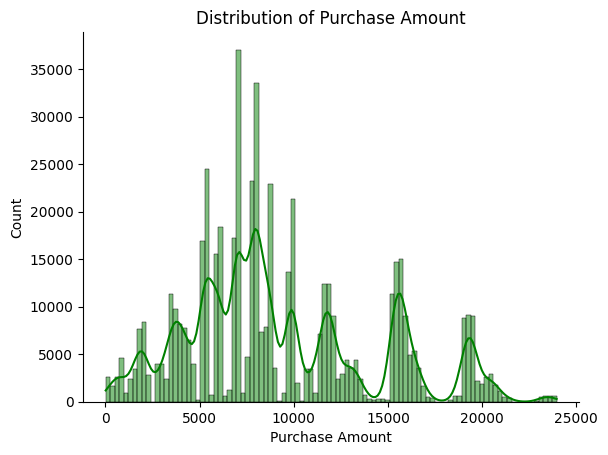

In [10]:
sns.histplot(x="Purchase", data=df, bins=100, kde=True, color='green')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
sns.despine()
plt.show()

There appears to be many spikes at different purchase amounts with most purchases taking place around the 7500 mark.

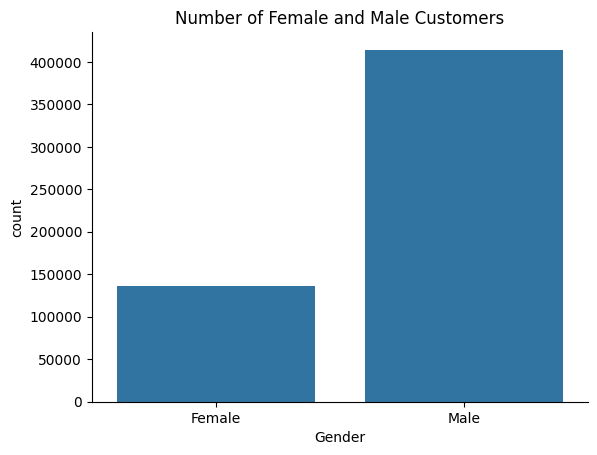

In [11]:
sns.countplot(x="Gender", data=df)
plt.title("Number of Female and Male Customers")
sns.despine()
plt.show()

Interesting that there are over double the number of males in this dataset than females.

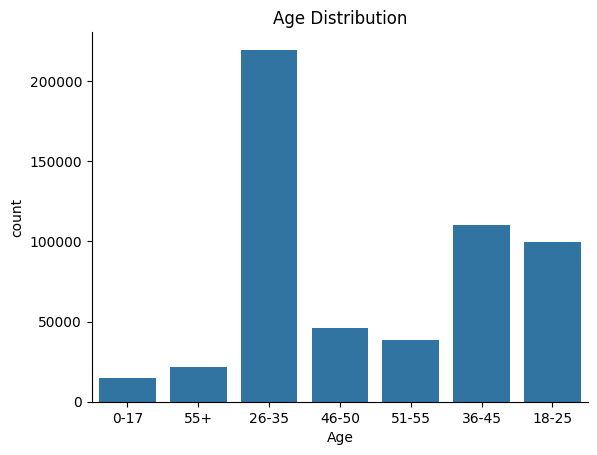

In [12]:
sns.countplot(x="Age", data=df)
plt.title("Age Distribution")
sns.despine()
plt.show()

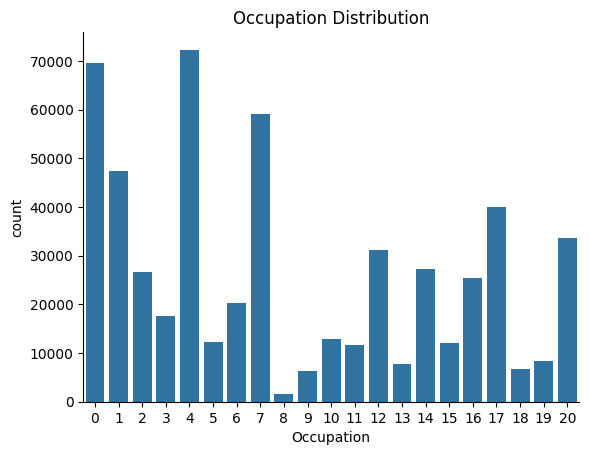

In [13]:
sns.countplot(x="Occupation", data=df)
plt.title("Occupation Distribution")
sns.despine()
plt.show()

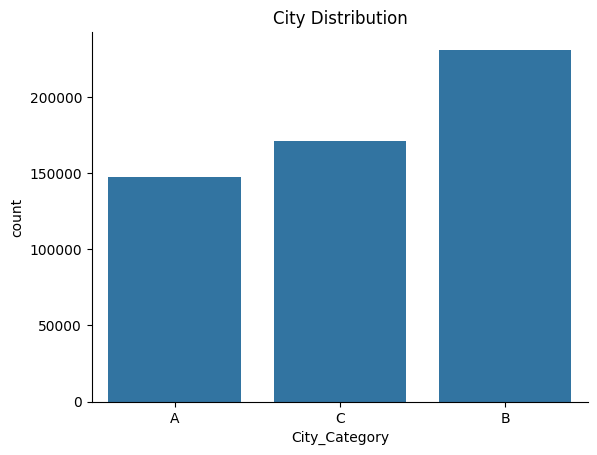

In [14]:
sns.countplot(x="City_Category", data=df)
plt.title("City Distribution")
sns.despine()
plt.show()

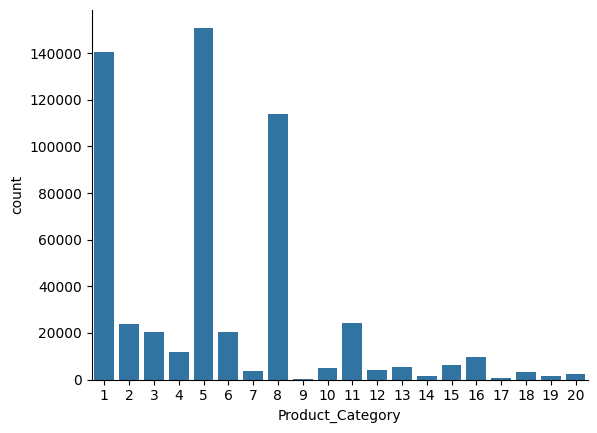

In [15]:
sns.countplot(x="Product_Category", data=df)
sns.despine()
plt.show()

How does the purchase amount vary by product category?

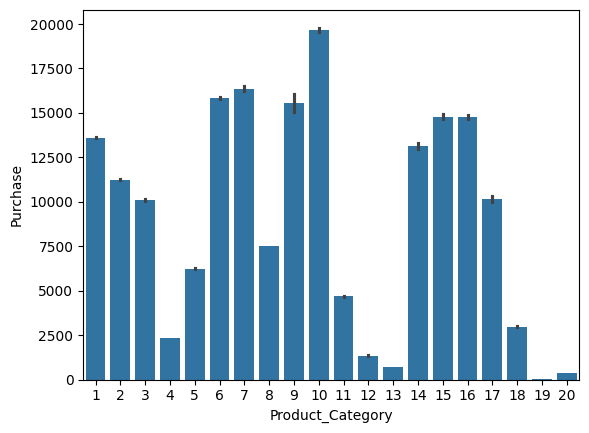

In [16]:
sns.barplot(x="Product_Category", y="Purchase", data=df,
            ci=None)
plt.show()

How does purchases compare across different age groups?

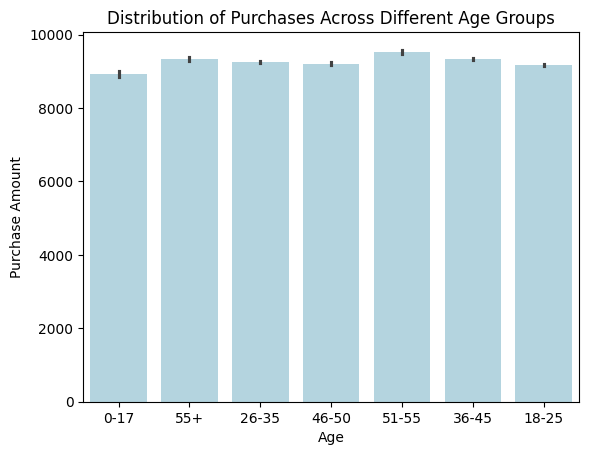

In [17]:
sns.barplot(x="Age", y="Purchase", data=df, color="lightblue",
            ci=None)
plt.title('Distribution of Purchases Across Different Age Groups')
plt.ylabel("Purchase Amount")
plt.show()

This one was a little interesting to me, especially the 0-17 year old group. How is it that the 0-17 year old group spends on average the same amount as the rest of the groups. Maybe this age group is in a specific occupation that allows them to spend a lot of money. Lets check that out.

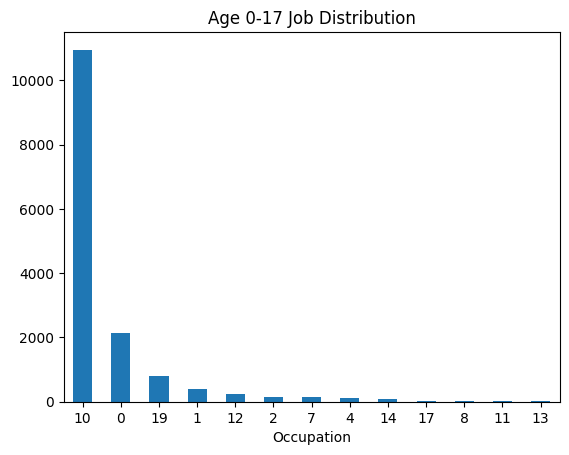

In [18]:
df[df["Age"] == "0-17"]["Occupation"].value_counts().plot(kind="bar")
plt.title("Age 0-17 Job Distribution")
plt.xticks(rotation=0)
plt.show()

Interesting, nearly all people aged 0-17 work in a similar occupation, however we cannot discover what that is.

Do males or females spend more on average?

Well it looks like they spend roughly the same.

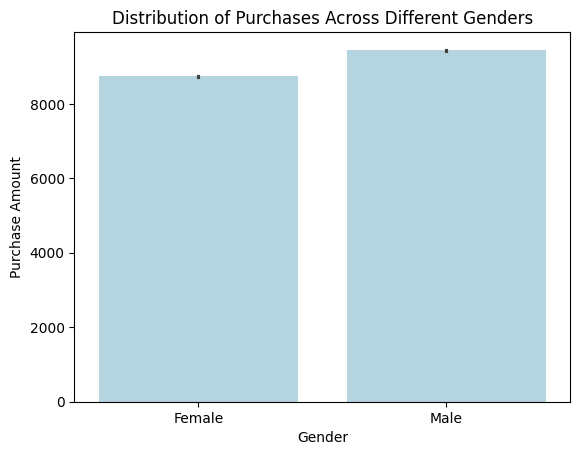

In [19]:
sns.barplot(x="Gender", y="Purchase", data=df, color="lightblue",
            ci=None)
plt.title('Distribution of Purchases Across Different Genders')
plt.ylabel("Purchase Amount")
plt.show()

Does the city matter to the amount of purchases ?

Again, it doesnt appear to be much difference between the difference cities.

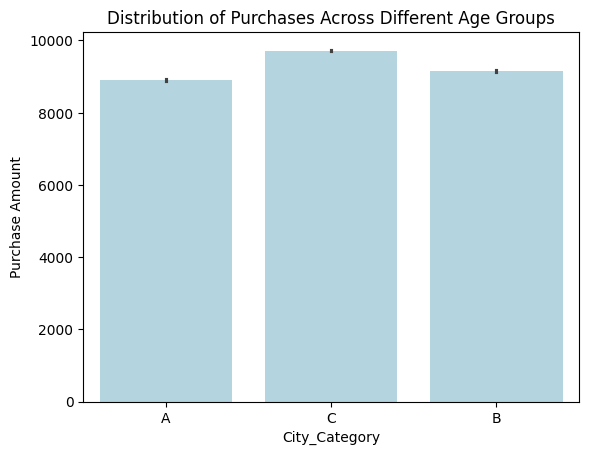

In [20]:
sns.barplot(x="City_Category", y="Purchase", data=df, color="lightblue",
            ci=None)
plt.title('Distribution of Purchases Across Different Age Groups')
plt.ylabel("Purchase Amount")
plt.show()

Do married couples spend more than individual customers?

Nope. They spending roughly the same which is also very interesting.

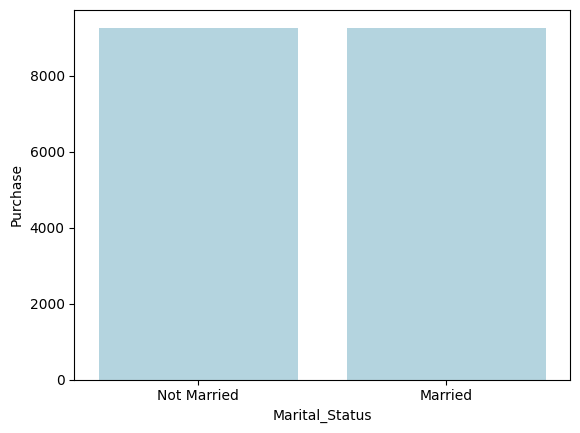

In [63]:
sns.barplot(x="Marital_Status", y="Purchase", data=df, color="lightblue",
            ci=None)
plt.show()

## Descriptive Statistics

Now we can put some numbers to some of these values.

In [22]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The average transaction amount is 9263 which is quite large

In [23]:
df["Gender"].value_counts()

Gender
Male      414259
Female    135809
Name: count, dtype: int64

In [24]:
df.groupby(by="Gender")["Purchase"].mean()

Gender
Female    8734.565765
Male      9437.526040
Name: Purchase, dtype: float64

In [25]:
df.groupby(by="Marital_Status")["Purchase"].mean()

Marital_Status
Married        9261.174574
Not Married    9265.907619
Name: Purchase, dtype: float64

In [26]:
# number of unique buyers
len(df["User_ID"].unique())

5891

In [27]:
df2 = pd.DataFrame(df.groupby(by="User_ID").size())
df2

,0
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


In [28]:
# total spent by each user
df3 = pd.DataFrame(df.groupby(by="User_ID")["Purchase"].sum()).sort_values(by="Purchase", ascending=False)
df3

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
...,...
1004991,52371
1005117,49668
1003883,49349


In [29]:
indv_spending = pd.merge(df2, df3, on="User_ID")
indv_spending.rename(columns={0:"num_purchases", "Purchase": "total_purchase"},
                     inplace=True)
indv_spending

,num_purchases,total_purchase
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


In [30]:
round(indv_spending["num_purchases"].mean(),0).astype("int")

93

In [31]:
indv_spending["total_purchase"].median()

521213.0

In [32]:
round(indv_spending["total_purchase"].skew(),2)

2.43

In [33]:
round(indv_spending["total_purchase"].kurtosis(),2)

8.54

In [34]:
log_indv_spending = pd.DataFrame(np.log(indv_spending["total_purchase"]))

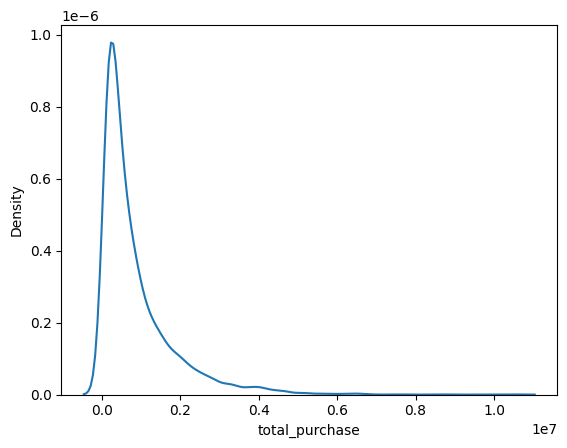

In [35]:
sns.kdeplot(data=indv_spending, x="total_purchase")
plt.show()

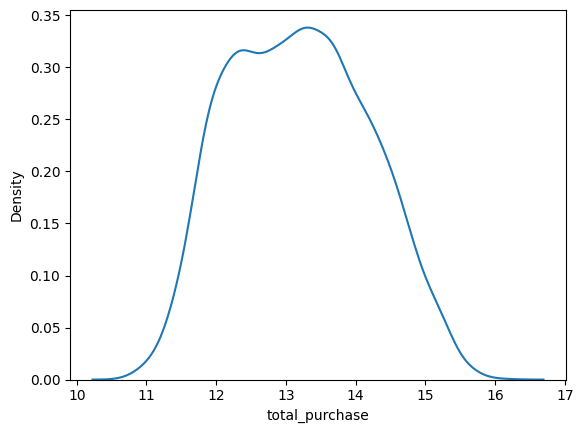

In [36]:
sns.kdeplot(data=log_indv_spending, x="total_purchase")
plt.show()

In [37]:
log_indv_spending.skew()

total_purchase    0.136524
dtype: float64

In [38]:
log_indv_spending.kurtosis()

total_purchase   -0.755807
dtype: float64

In [67]:
df_grouped = pd.DataFrame(df.groupby(by=["Age", "Gender", "City_Category"])["Purchase"].mean())

In [68]:
df_grouped

Purchase
Age   Gender City_Category              
0-17  Female A               7826.252246
             B               8846.238339
             C               8313.388701
      Male   A               9655.655424
             B               8946.030233
             C               9365.363025
18-25 Female A               8151.940820
             B               8024.474499
             C               9080.970478
      Male   A               9034.719787
             B               9404.652039
             C               9881.569872
26-35 Female A               8701.506775
             B               8568.878015
             C               9056.760825
      Male   A               9030.545010
             B               9326.538127
             C              10052.349437
36-45 Female A               8716.853624
             B               8755.274887
             C               9406.433724
      Male   A               9089.917743
             B               9215.269979
             C              10040.668889
46-50 Female A               8735.585600
             B               8619.864616
             C               9122.771686
      Male   A               8272.417964
             B               9535.179831
             C               9720.595405
51-55 Female A               8710.023622
             B               8876.350695
             C               9377.025303
      Male   A               9837.063180
             B               9486.942732
             C               9925.189470
55+   Female A               9240.678571
             B               9010.011103
             C               8980.591746
      Male   A               8400.335307
             B              10084.874049
             C               9530.313690

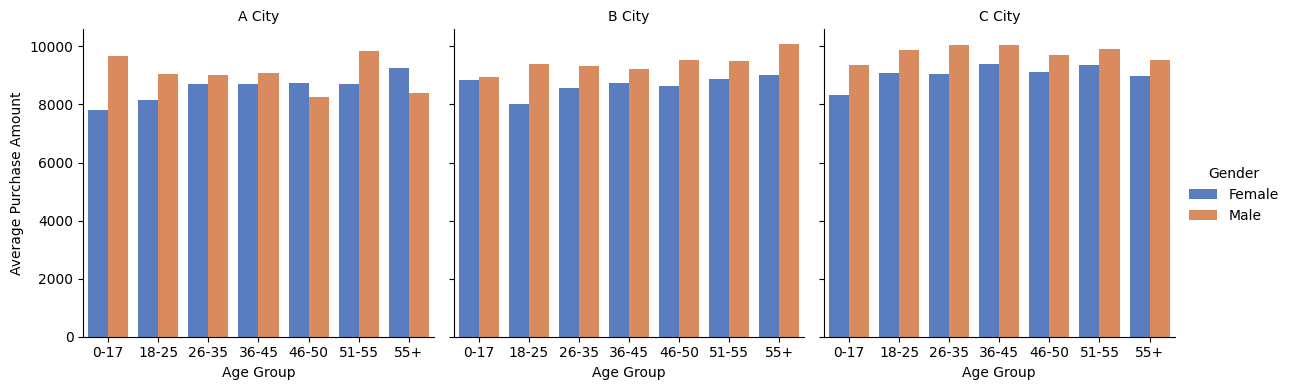

In [62]:
g = sns.catplot(
    data=df_grouped,
    kind="bar",
    x="Age",
    y="Purchase",
    hue="Gender",
    col="City_Category",
    ci=None,
    palette="muted",
    height=4,
    aspect=1
)

g.set_axis_labels("Age Group", "Average Purchase Amount")
g.set_titles("{col_name} City")
g.legend.set_title("Gender")

plt.show()

## Predictive Modeling

## Conclusion